<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/Prove_Week_5_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


In [3]:
edu = pd.read_csv("xAPI-Edu-Data.csv")

edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


1. Gender - student's gender (nominal: 'Male' or 'Female’)

2. Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3. Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4. Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5. Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6. Section ID- classroom student belongs (nominal:’A’,’B’,’C’)
7. Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8. Semester- school year semester (nominal:’ First’,’ Second’)

9. Parent responsible for student (nominal:’mom’,’father’)

10. Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11. Visited resources- how many times the student visits a course content(numeric:0-100)

12. Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13. Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14. Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15. Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16. Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

In [4]:
edu.shape

(480, 17)

In [5]:
edu.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [6]:
edu.isnull().sum(axis = 0)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
# switch binary nominal features into numeric value (0,1) + Class
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
edu.iloc[:, np.r_[0,7,8,13,14,15,16]] = edu.iloc[:, np.r_[0,7,8,13,14,15,16]].apply(le.fit_transform) 


edu.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,0,15,16,2,20,1,1,1,2
1,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,0,20,20,3,25,1,1,1,2
2,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,0,10,7,0,30,0,0,0,1
3,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,0,30,25,5,35,0,0,0,1
4,1,KW,KuwaIT,lowerlevel,G-04,A,IT,0,0,40,50,12,50,0,0,0,2


In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X = edu.drop(columns = 'Class', axis = 1)
y = np_utils.to_categorical(edu.Class)

# multiple discrete features - One hot encoding
X = pd.get_dummies(X)


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

Using TensorFlow backend.


In [9]:
train_X.shape

(336, 66)

In [0]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_X)

train_X = sc.transform(train_X)
test_X = sc.transform(test_X)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier = Sequential()
classifier.add(Dense(10, input_dim = 66, activation= "relu"))
classifier.add(Dense(10, activation= "relu"))
classifier.add(Dense(3, activation= "softmax"))

classifier.compile(optimizer = "adam",  loss = "categorical_crossentropy", metrics = ["accuracy"])

In [35]:
# weight(W) start with random number
history = classifier.fit(train_X, train_y, epochs=100, batch_size=64)
history

Epoch 1/100
336/336 [==============================] - 0s 48us/step - loss: 0.2024 - accuracy: 0.9405
Epoch 2/100
336/336 [==============================] - 0s 33us/step - loss: 0.2014 - accuracy: 0.9405
Epoch 3/100
336/336 [==============================] - 0s 32us/step - loss: 0.1999 - accuracy: 0.9405
Epoch 4/100
336/336 [==============================] - 0s 31us/step - loss: 0.1984 - accuracy: 0.9435
Epoch 5/100
336/336 [==============================] - 0s 31us/step - loss: 0.1975 - accuracy: 0.9435
Epoch 6/100
336/336 [==============================] - 0s 33us/step - loss: 0.1966 - accuracy: 0.9435
Epoch 7/100
336/336 [==============================] - 0s 31us/step - loss: 0.1952 - accuracy: 0.9435
Epoch 8/100
336/336 [==============================] - 0s 34us/step - loss: 0.1936 - accuracy: 0.9435
Epoch 9/100
336/336 [==============================] - 0s 33us/step - loss: 0.1935 - accuracy: 0.9435
Epoch 10/100
336/336 [==============================] - 0s 33us/step - loss: 0.192

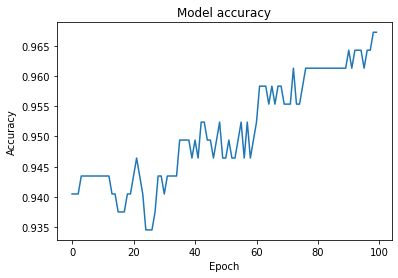

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

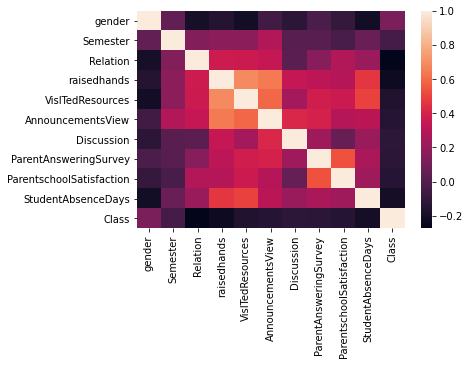

In [50]:
import seaborn as sns

edu_correlations = edu.corr()
#variable_correlations
sns.heatmap(edu_correlations)